In [465]:
import os

def parse_file(filename, num_turns):
    with open(filename) as f:
        for line in f.readlines()[1:]:
            turns, tasks, avg = line.split(",")

            if int(turns) == num_turns:
                return int(tasks)
    
    # raise Exception(f"only {turns} turns in {filename}")

    try:
        return int(tasks)
    except:
        print(f"{filename}: tasks never initialized, file len: {len(open(filename).readlines())}")
        return 0

def parse_points(filename):
    points = []
    with open(filename) as f:
        for line in f.readlines()[1:]:
            turns, tasks, avg = line.split(",")
            points.append((int(turns), int(tasks)))


    try:
        return [(tu, ta / int(tasks)) for tu, ta in points]
    except:
        print(f"file {filename} len: {len(open(filename).readlines())}")
        return []


def get_results(num_abilities, difficulty=None, num_turns=-1, dims_group=-1):
    groups = {g:[] for g in range(1, 11)}
    for file in os.listdir("results/t3/"):
        m, a, g, t, task_lvl, group_abs, abs_lvl = file[:-4].split("_")[1:]
        num_members = int(m[1:])
        num_abs = int(a[1:])
        group = int(g[1:])
        group_task_difficulty = [int(t[1:]), task_lvl]
        group_ability_difficulty =  [int(group_abs[1:]), abs_lvl]

        if difficulty and (difficulty != group_task_difficulty[1] or difficulty != group_ability_difficulty[1]):
            continue

        if dims_group > 0 and int(group_abs[1:]) != dims_group:
            continue

        if num_abilities != num_abs:
            continue

        turns = parse_file("results/t3/" + file, num_turns)

        groups[group].append(turns)

    return groups

def get_points(target_group):
    points = []
    for file in os.listdir("results/t3/"):
        m, a, g, t, task_lvl, group_abs, abs_lvl = file[:-4].split("_")[1:]
        num_members = int(m[1:])
        num_abs = int(a[1:])
        group = int(g[1:])
        group_task_difficulty = [int(t[1:]), task_lvl]
        group_ability_difficulty =  [int(group_abs[1:]), abs_lvl]

        if target_group != group:
            continue

        file_points = parse_points("results/t3/" + file)
        points.extend(file_points)

    return points


results/t3/results_m10_a3_g8_t8_hard_a8_hard.csv: tasks never initialized, file len: 1
results/t3/results_m10_a3_g6_t4_hard_a4_hard.csv: tasks never initialized, file len: 1
results/t3/results_m10_a3_g10_t4_hard_a4_hard.csv: tasks never initialized, file len: 1
results/t3/results_m10_a3_g8_t4_hard_a4_hard.csv: tasks never initialized, file len: 1


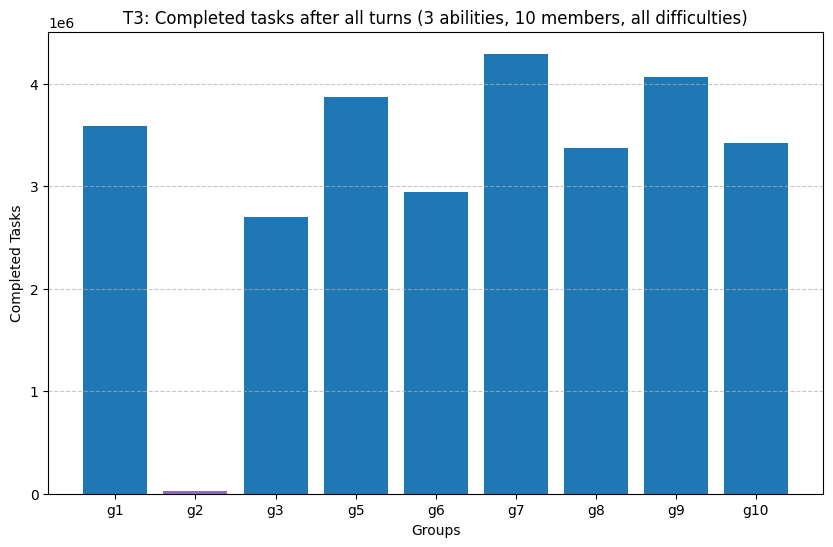

In [469]:
import matplotlib.pyplot as plt

abs = 3
groups = get_results(num_abilities=abs, difficulty=None)

k = [f"g{g}" for g in groups.keys()]
v = [sum(x) for x in groups.values()]
k = k[:3] + k[4:]
v = v[:3] + v[4:]

plt.figure(figsize=(10, 6))
colors = ['C0' if k[i] != "g2" else 'C4' for i in range(len(k))]
plt.bar(k, v, color=colors)
plt.xlabel('Groups')
plt.ylabel('Completed Tasks')
plt.title(f'T3: Completed tasks after all turns ({abs} abilities, 10 members, all difficulties)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


file results/t3/results_m10_a5_g7_t4_hard_a4_hard.csv len: 1001


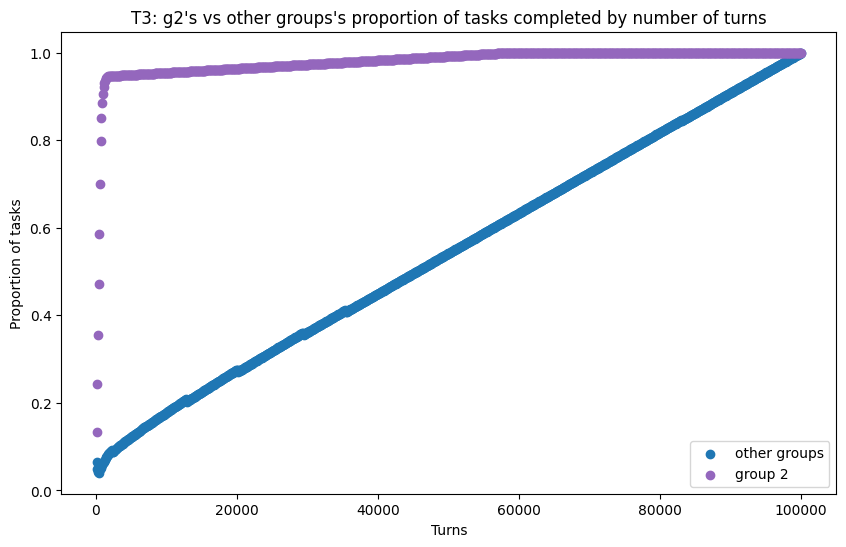

In [467]:
import matplotlib.pyplot as plt
import numpy as np

abs = 3
g2points = get_points(2)

avg = dict()
for turns, tasks in g2points:
    if turns not in avg:
        avg[turns] = []
    avg[turns].append(tasks)

g2points = [(k, sum(v) / len(v)) for k, v in avg.items()]

x2 = np.array([i for i, _ in g2points])
y2 = np.array([j for _, j in g2points])

# slope, intercept = np.polyfit(x, y, 1)
# y_pred = slope * x + intercept

otherpoints = []
for g in range(1, 11):
    if g == 2:
        continue
    points = get_points(g)
    otherpoints.extend(points)


avg = dict()
for turns, tasks in otherpoints:
    if turns not in avg:
        avg[turns] = []
    avg[turns].append(tasks)

otherpoints = [(k, sum(v) / len(v)) for k, v in avg.items()]

xo = np.array([i for i, _ in otherpoints])
yo = np.array([j for _, j in otherpoints])


plt.figure(figsize=(10, 6))
plt.scatter(xo, yo, color="C0", label="other groups")
plt.scatter(x2, y2, color="C4", label="group 2")
plt.legend()


plt.xlabel('Turns')
plt.ylabel('Proportion of tasks')
plt.title(f"T3: g2's vs other groups's proportion of tasks completed by number of turns")

plt.show()

# weird linear slope is group 4's hard distribution


results/t3/results_m10_a3_g8_t8_hard_a8_hard.csv: tasks never initialized, file len: 1
results/t3/results_m10_a3_g6_t4_hard_a4_hard.csv: tasks never initialized, file len: 1
results/t3/results_m10_a3_g10_t4_hard_a4_hard.csv: tasks never initialized, file len: 1
results/t3/results_m10_a3_g8_t4_hard_a4_hard.csv: tasks never initialized, file len: 1


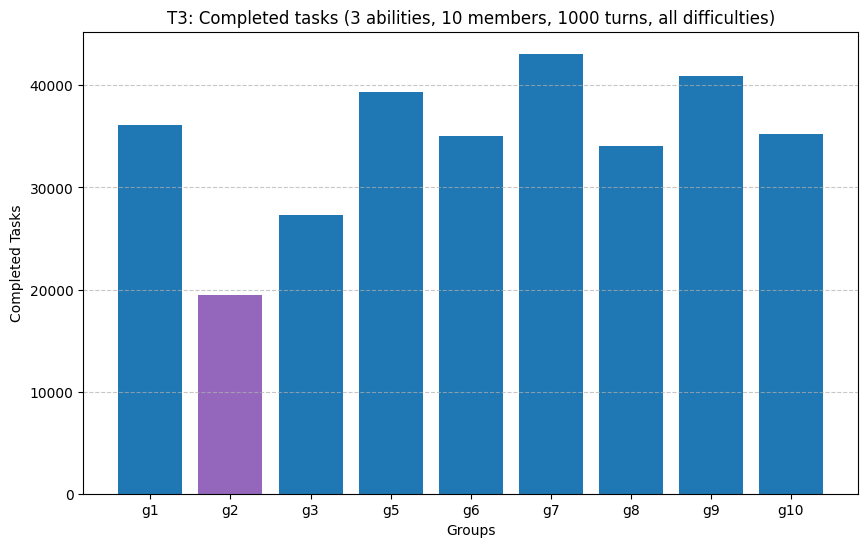

In [473]:
import matplotlib.pyplot as plt

turns = 1000
abs =3
groups = get_results(num_abilities=abs, num_turns=turns, difficulty=None)

k = [f"g{g}" for g in groups.keys()]
v = [sum(x) for x in groups.values()]
k.pop(3)
v.pop(3)

plt.figure(figsize=(10, 6))
colors = ['C0' if k[i] != "g2" else 'C4' for i in range(len(k))]
plt.bar(k, v, color=colors)
plt.xlabel('Groups')
plt.ylabel('Completed Tasks')
plt.title(f'T3: Completed tasks ({abs} abilities, 10 members, {turns} turns, all difficulties)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


results/t3/results_m10_a3_g8_t8_hard_a8_hard.csv: tasks never initialized, file len: 1
results/t3/results_m10_a3_g6_t4_hard_a4_hard.csv: tasks never initialized, file len: 1
results/t3/results_m10_a3_g10_t4_hard_a4_hard.csv: tasks never initialized, file len: 1
results/t3/results_m10_a3_g8_t4_hard_a4_hard.csv: tasks never initialized, file len: 1


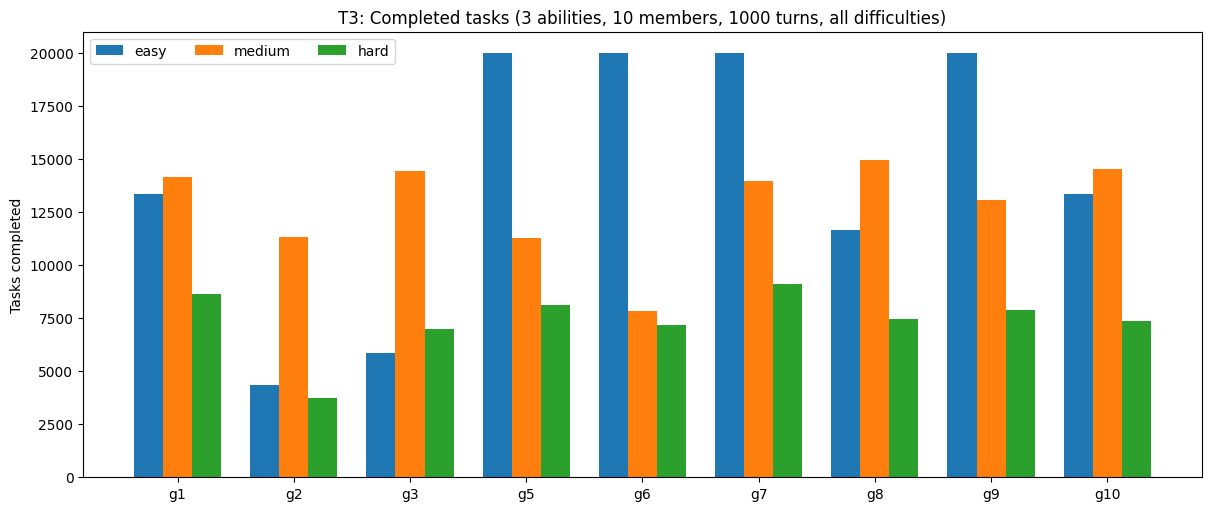

In [474]:
import matplotlib.pyplot as plt
import numpy as np

turns = 1000
abs =3
easy_groups = get_results(num_abilities=abs, num_turns=turns, difficulty="easy")
mid_groups = get_results(num_abilities=abs, num_turns=turns, difficulty="medium")
hard_groups = get_results(num_abilities=abs, num_turns=turns, difficulty="hard")

k = [f"g{g}" for g in easy_groups.keys()]

k.pop(3)


leg = list(easy_groups.values())
leg.pop(3)
lmg = list(mid_groups.values())
lmg.pop(3)
lhg = list(hard_groups.values())
lhg.pop(3)

data = {"easy": [sum(scores) for scores in leg], 
        "medium": [sum(scores) for scores in lmg], 
        "hard": [sum(scores) for scores in lhg]}

# plt.figure(figsize=(10, 6))
colors = ['C0' if k[i] != "g2" else 'C4' for i in range(len(k))]
multiplier = 0
width = 0.25
x = np.arange(len(leg))

fig, ax = plt.subplots(figsize=(12, 5), layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Tasks completed')
ax.set_xticks(x + width, k)
ax.legend(loc='upper left', ncols=3)
plt.title(f'T3: Completed tasks ({abs} abilities, 10 members, {turns} turns, all difficulties)')
plt.show()


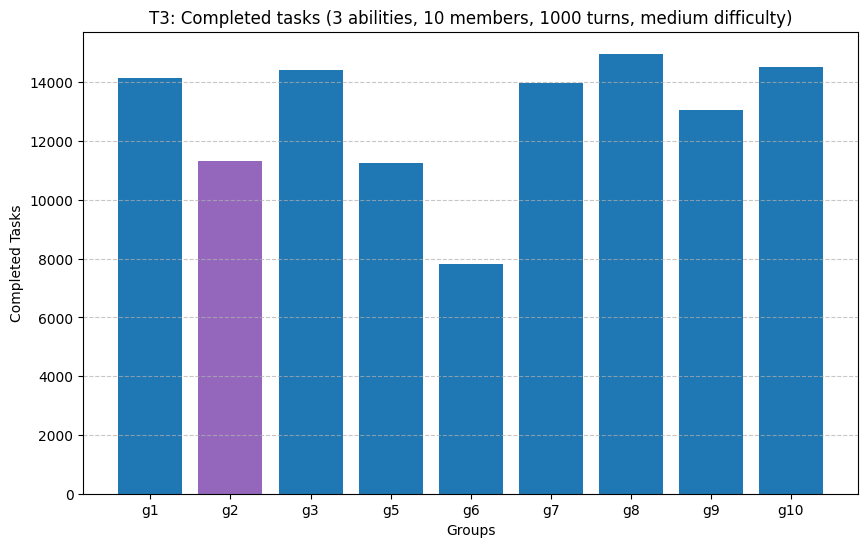

In [476]:
import matplotlib.pyplot as plt

turns = 1000
abs =3
groups = get_results(num_abilities=abs, num_turns=turns, difficulty="medium")

k = [f"g{g}" for g in groups.keys()]
v = [sum(x) for x in groups.values()]
k.pop(3)
v.pop(3)

plt.figure(figsize=(10, 6))
colors = ['C0' if k[i] != "g2" else 'C4' for i in range(len(k))]
plt.bar(k, v, color=colors)
plt.xlabel('Groups')
plt.ylabel('Completed Tasks')
plt.title(f'T3: Completed tasks ({abs} abilities, 10 members, {turns} turns, medium difficulty)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


results/t3/results_m10_a5_g4_t9_medium_a9_medium.csv: tasks never initialized, file len: 1


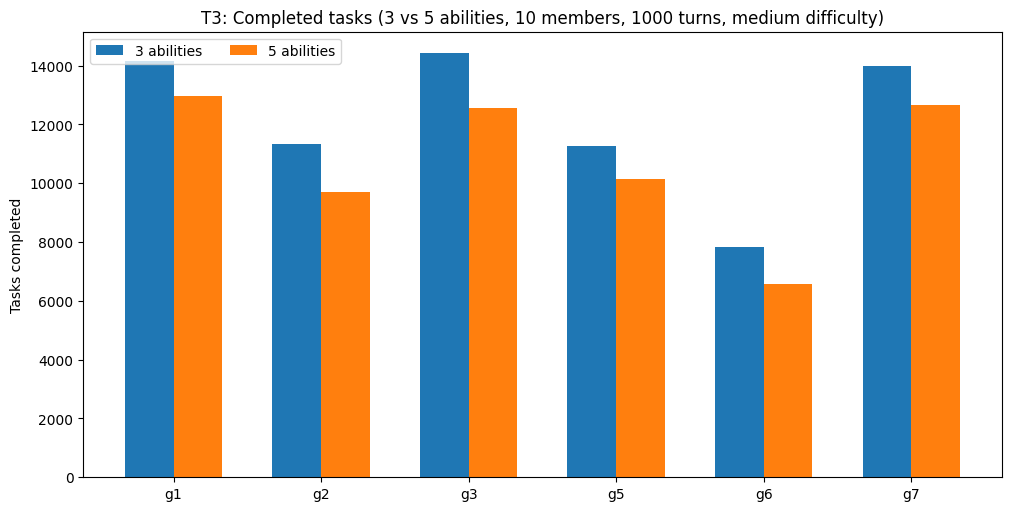

In [477]:
import matplotlib.pyplot as plt
import numpy as np

turns = 1000
abs3_groups = get_results(num_abilities=3, num_turns=turns, difficulty="medium")
abs5_groups = get_results(num_abilities=5, num_turns=turns, difficulty="medium")

data = {"3 abilities": [sum(scores) for scores in abs3_groups.values()], 
        "5 abilities": [sum(scores) for scores in abs5_groups.values()]}

multiplier = 0.5
width = 0.33

fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

exclude = ["g4", "g8", "g9", "g10"]
k = [f"g{g}" for g in easy_groups.keys() ]
exc_idxs = [k.index(g) for g in exclude]
k = [f"g{g}" for g in easy_groups.keys() if f"g{g}" not in exclude]
colors = ['C0' if k[i] != "g2" else 'C4' for i in range(len(k))]


x = np.arange(len(k) )

for attribute, measurement in data.items():
    measurement = [measurement[i] for i in range(len(measurement)) if i not in exc_idxs]
    
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('Tasks completed')
ax.set_xticks(x + width, k)
ax.legend(loc='upper left', ncols=3)
plt.title(f'T3: Completed tasks (3 vs 5 abilities, 10 members, {turns} turns, medium difficulty)')
plt.show()


# T2 + T4

In [418]:
def get_t4_results(num_abilities):
    all_turns = []
    for file in os.listdir("results/t4/"):
        m, a, t, task_lvl, group_abs, abs_lvl = file[:-4].split("_")[1:]
        num_members = int(m[1:])
        num_abs = int(a[1:])
        group_task_difficulty = [int(t[1:]), task_lvl]
        group_ability_difficulty =  [int(group_abs[1:]), abs_lvl]


        if group_task_difficulty != [8, "hard"]:
            continue


        print(f"parsing {file}")
        turns = parse_file("results/t4/" + file, -1)

        all_turns.append((turns, num_members))

    return all_turns

def get_t2_results(num_abilities, missing):
    all_turns = []
    for file in os.listdir("results/t2"):
        # m, a, t, task_lvl, group_abs, abs_lvl = file[:-4].split("_")[1:]
        f = file[:-4]
        num_members = int(f.split("_")[1][1:])

        a = f.index("a") 
        num_abs = int(f[a+1])

        if num_abilities != num_abs:
            continue

        lo = f.index("leftout")
        leftout = int(f[lo+len("leftout")])

        if missing != leftout:
            continue
            
        rest = f[lo+len("leftout"):]
        _, t, t_lvl, a, a_lvl = rest.split("_")
        group_task_difficulty = (int(t[1:]), t_lvl)

        # if group_task_difficulty != (8, "hard"):
        #     continue

        print(f"parsing {file}")
        turns = parse_file("results/t2/" + file, -1)

        all_turns.append((turns, num_members))

    return all_turns

parsing results_m50_a5_t8_hard_a8_hard.csv
parsing results_m10_a5_t8_hard_a8_hard.csv
[(85431, 50), (21498, 10)]
parsing results_m9_a5_g1_3_4_5_6_7_8_9_10_leftout2_t8_hard_a8_hard.csv
[(125, 9)]


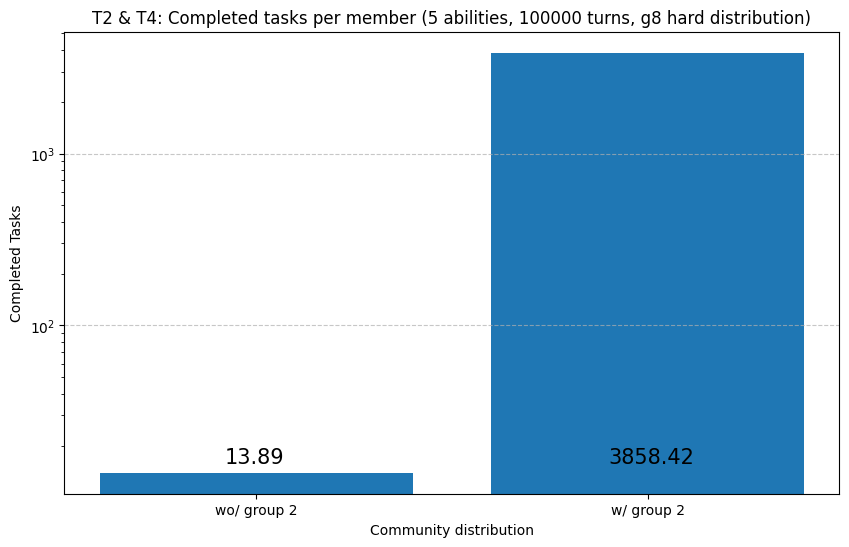

In [419]:
import matplotlib.pyplot as plt
import numpy as np

turns = 100_000
abs = 5

t4 = get_t4_results(abs)
print(t4)

# we're missing results from all groups except ours in T2-g4-revised
# we have some in the initial T2
t2 = get_t2_results(num_abilities=abs, missing=2)
print(t2)


k = ["wo/ group 2", "w/ group 2"]
v = [sum([scores/num_members for scores, num_members in t2]), sum([scores/num_members for scores, num_members in t4])]

plt.figure(figsize=(10, 6))
bars = plt.bar(k, v)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.08 - i * 0.02, 15.8, f"{round(v[i], 2)}", fontsize=15)
plt.xlabel('Community distribution')
plt.yscale("log")
plt.ylabel('Completed Tasks')
plt.title(f'T2 & T4: Completed tasks per member ({abs} abilities, {turns} turns, g8 hard distribution)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [420]:

def get_t1_results(dim_group, difficulty ):
    all_tasks = []
    for file in os.listdir("results/t1"):
        m, a, g1, g2, group_task, task_lvl, group_abs, abs_lvl = file[:-4].split("_")[1:]


        g1 = int(g1[1:])
        g2 = int(g2)


        if task_lvl != difficulty or dim_group != int(group_task[1:]):
            continue

        if 2 not in [g1, g2]:
            continue

        other = g1 if g2 == 2 else g2

        if other == 4:
            continue
            
        print(f"parsing {file}")
        tasks = parse_file("results/t1/" + file, 1000)

        all_tasks.append((tasks, other))

    return all_tasks

parsing results_m10_a3_g2_6_t1_medium_a1_medium.csv
parsing results_m10_a3_g2_9_t1_medium_a1_medium.csv
parsing results_m10_a3_g2_5_t1_medium_a1_medium.csv
parsing results_m10_a3_g2_8_t1_medium_a1_medium.csv
parsing results_m10_a3_g2_7_t1_medium_a1_medium.csv
parsing results_m10_a3_g2_3_t1_medium_a1_medium.csv
parsing results_m10_a3_g1_2_t1_medium_a1_medium.csv
parsing results_m10_a3_g2_10_t1_medium_a1_medium.csv
g1: 0.032 | 4089 combined vs 3962.5 individual
g3: -0.029 | 3963 combined vs 4082.5 individual
g5: 0.04 | 3914 combined vs 3765.0 individual
g6: 0.6 | 3649 combined vs 2280.5 individual
g7: -0.045 | 3718 combined vs 3894.0 individual
g8: -0.4 | 2579 combined vs 4300.0 individual
g9: -0.123 | 3825 combined vs 4361.5 individual
g10: -0.001 | 4420 combined vs 4425.0 individual


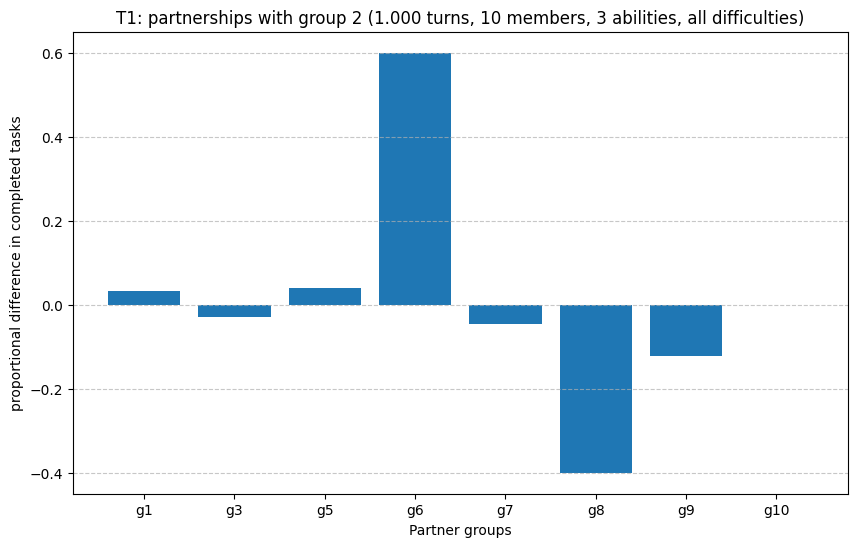

In [479]:
groups = get_results(3, difficulty="medium", num_turns=1000, dims_group=1)
res = get_t1_results(dim_group=1, difficulty="medium")

res.sort(key=lambda x:x[1])

k =[]
v =[]

# [ind, com]
gr = [[None, None] for _ in range(11)] 
del groups[4]
for score, o in res:
    gr[o][1] = score


for group, score in groups.items():
    ind = (score[0] + groups[2][0]) / 2
    gr[group][0] = ind

del groups[2]
for group in groups.keys():
    ind, comb= gr[group]
    improvement = (comb / ind) - 1

    print(f"g{group}: {round(improvement, 3)} | {comb} combined vs {ind} individual")
    k.append(f"g{group}") 
    v.append(improvement) 


plt.figure(figsize=(10, 6))
bars = plt.bar(k, v)
plt.xlabel('Partner groups')
plt.ylabel('proportional difference in completed tasks')
plt.title(f'T1: partnerships with group 2 (1.000 turns, 10 members, 3 abilities, all difficulties)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()